<a href="https://colab.research.google.com/github/ally-sketch/Data-Science-Projects-Collection./blob/main/Basic%20Python%20and%20Data%20Intelligence/Dibimbing/template_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Investigasi sampel data titanic berikut dengan cara :
1. Cek secara head, tail, sample, info lalu observasi apa yang bisa anda peroleh ?
2. Lakukan Statistical Summary dengan mengekstrak informasi yang didapat dari observasi anda ?
3. Cek apakah ada duplikat dan bagaimana handlenya ?
4. Cek apakah ada missing value, berapa persentasenya jika ada, dan bagaimana cara handlenya ?

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df = pd.read_excel('titanic.xlsx')
df.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


EDA (Exploratory Data Analysis)


---


In EDA, i know we have to do five steps

1. Check Data Types
2. Check Missing Values
3. Check Duplicated
4. Check Inconsistent Data
5. Check Outlier

# **Handling Data Type**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [5]:
df.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [6]:
df.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [7]:
df.sample()

,survived,name,sex,age
200,0,"McCaffry, Mr. Thomas Francis",male,46.0


# **Handling Missing Value**

In [9]:
df.isnull().sum()

,0
survived,0
name,0
sex,0
age,49


Dari data yang dicari terdapat data umur yang kosong sebanyak 49 data.

In [17]:
df['age'].describe()


,age
count,451.000000
mean,35.917775
std,14.766454
min,0.666700
25%,24.000000
50%,35.000000
75%,47.000000
max,80.000000


In [10]:
df.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [15]:
categoricals = ['sex']
numericals = ['age', 'survived']
texts = ['name']

In [19]:
df[numericals].describe()


,age,survived
count,451.000000,500.000000
mean,35.917775,0.540000
std,14.766454,0.498897
min,0.666700,0.000000
25%,24.000000,0.000000
50%,35.000000,1.000000
75%,47.000000,1.000000
max,80.000000,1.000000


In [21]:
df[categoricals].describe()

,sex
count,500
unique,2
top,male
freq,288


In [22]:
df[texts].describe()

,name
count,500
unique,499
top,"Eustis, Miss. Elizabeth Mussey"
freq,2


In [23]:
(len(df.drop_duplicates()))/len(df)


0.998

In [25]:
duplicates = df[df.duplicated(keep=False)]


In [26]:
duplicates

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0


In [28]:
df = df.drop_duplicates()


In [29]:
(len(df.drop_duplicates()))/len(df)


1.0

Saat ini data duplikat yang diketahui sudah terhapus

# **Handling Insconsisctent Data**

In [30]:
df.describe()

,survived,age
count,499.000000,450.000000
mean,0.539078,35.877593
std,0.498971,14.758183
min,0.000000,0.666700
25%,0.000000,24.000000
50%,1.000000,35.000000
75%,1.000000,47.000000
max,1.000000,80.000000


In [31]:
df['age'].value_counts().sort_index()


,count
age,
0.6667,1
0.8333,1
0.9167,1
1.0000,3
2.0000,1
3.0000,1
4.0000,2
6.0000,2
7.0000,1


In [32]:
df_not_inconsistent = df[(df['age'] < 1) | (df['age'] % 1 != 0)].sort_values('age')

df_not_inconsistent['age'].value_counts().sort_index()

,count
age,
0.6667,1
0.8333,1
0.9167,1
28.5000,1
32.5000,1
45.5000,1


In [33]:
df.loc[df['age'] < 1, 'age'] = 1
df[df['age'] < 1]


,survived,name,sex,age


In [43]:
df.loc[df['age'] % 1 != 0, 'age'] = df['age'].round()



In [44]:
df[df['age']%1 != 0]


,survived,name,sex,age
15,0,"Baumann, Mr. John D",male,NaN
37,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN
40,0,"Brewe, Dr. Arthur Jackson",male,NaN
46,0,"Cairns, Mr. Alexander",male,NaN
59,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN
69,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN
70,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN
74,0,"Clifford, Mr. George Quincy",male,NaN
80,0,"Crafton, Mr. John Bertram",male,NaN
106,0,"Farthing, Mr. John",male,NaN


In [35]:
df.describe()

,survived,age
count,499.000000,450.000000
mean,0.539078,35.877778
std,0.498971,14.756696
min,0.000000,1.000000
25%,0.000000,24.000000
50%,1.000000,35.000000
75%,1.000000,47.000000
max,1.000000,80.000000


from matplotlib import pyplot as plt
_df_0['survived'].plot(kind='hist', bins=20, title='survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='survived', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['survived'].plot(kind='line', figsize=(8, 4), title='survived')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

In [36]:
print(df['survived'].value_counts())

survived
1    269
0    230
Name: count, dtype: int64


In [37]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

batas_atas = Q3 + (1.5 * IQR)
batas_bawah = Q1 - (1.5 * IQR)

outliers = df[(df['age'] > batas_atas) | (df['age'] < batas_bawah)]

In [45]:
outliers

,survived,name,sex,age


Value of Passengers:
sex
male      288
female    211
Name: count, dtype: int64


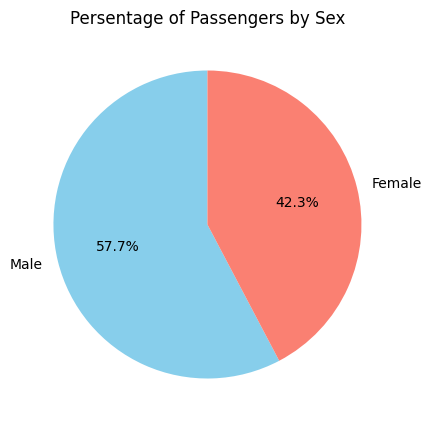

In [51]:
print(f'Value of Passengers:\n{df["sex"].value_counts()}')

plt.figure(figsize=(10, 5))
plt.pie(df['sex'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Persentage of Passengers by Sex')
plt.show()

Survived and Non-Survived: survived
1    269
0    230
Name: count, dtype: int64


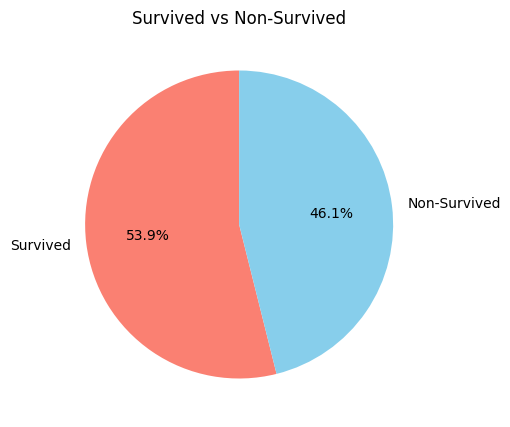

In [52]:
print(f'Survived and Non-Survived: {df["survived"].value_counts()}')

plt.figure(figsize=(10, 5))
plt.pie(df['survived'].value_counts(), labels=['Survived', 'Non-Survived'], autopct='%1.1f%%', startangle=90, colors=['salmon', 'skyblue'])
plt.title('Survived vs Non-Survived')
plt.show()

Value of Passengers that Survived:
sex
female    196
male       73
Name: count, dtype: int64


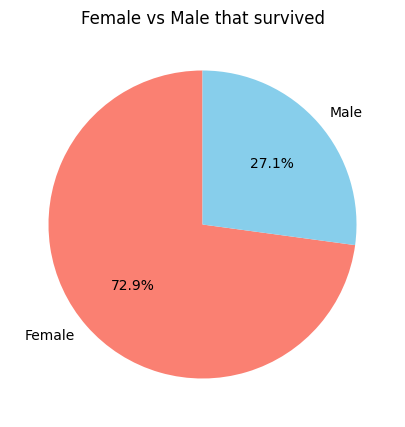

In [54]:
print(f'Value of Passengers that Survived:\n{df[df["survived"] == 1]["sex"].value_counts()}')

plt.figure(figsize=(10, 5))
plt.pie(df[df['survived'] == 1]['sex'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90, colors=['salmon', 'skyblue'])
plt.title('Female vs Male that survived')
plt.show()

Text(0.5, 0, 'Age')

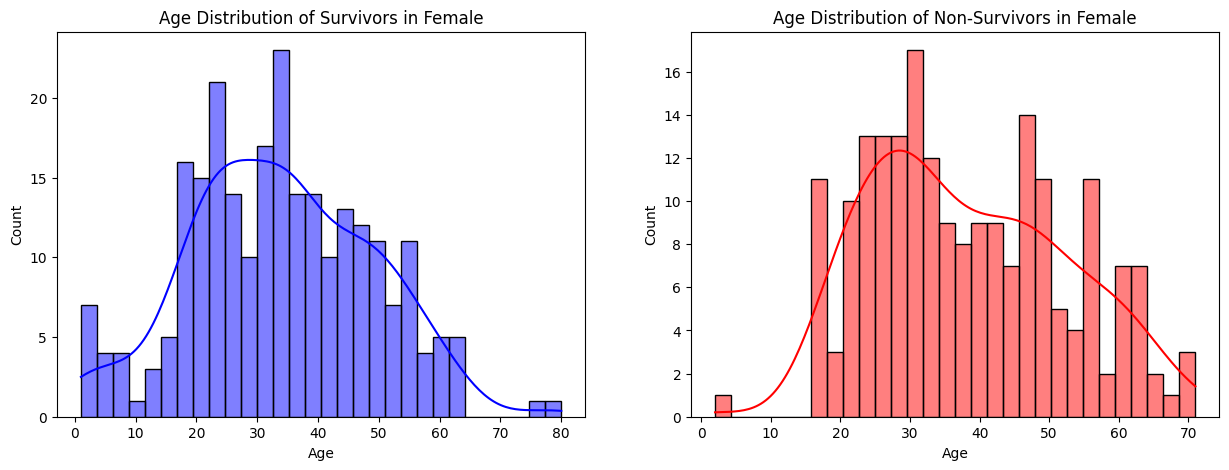

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df[df['survived'] == 1]['age'], bins=30, kde=True, ax = ax[0], color='blue')
ax[0].set_title('Age Distribution of Survivors in Female')
ax[0].set_xlabel('Age')

sns.histplot(df[df['survived'] == 0]['age'], bins=30, kde=True, ax = ax[1], color='red')
ax[1].set_title('Age Distribution of Non-Survivors in Female')
ax[1].set_xlabel('Age')

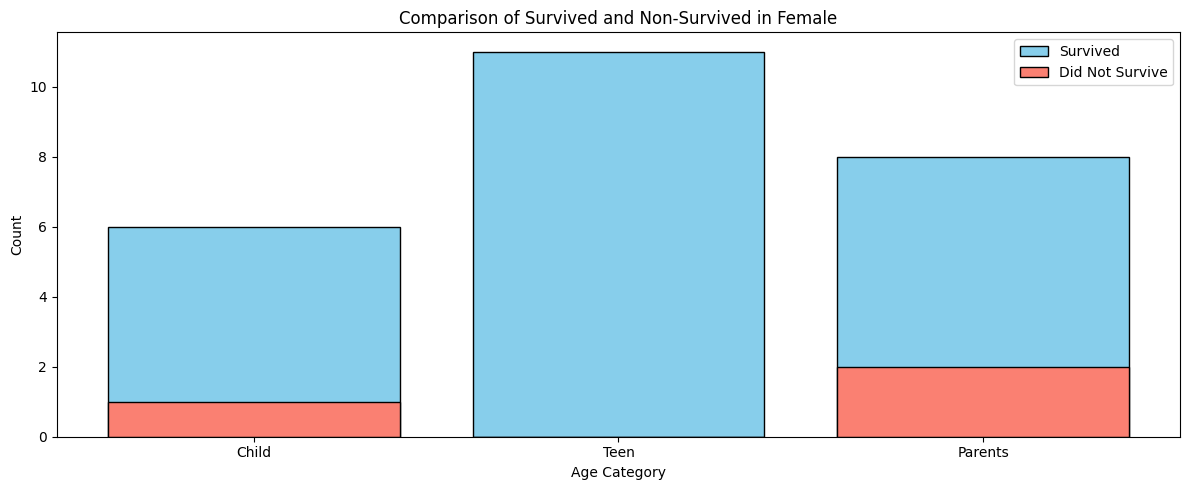

In [56]:
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Parents']
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

survived_females = df[(df['survived'] == 1) & (df['sex'] == 'female')]
non_survived_females = df[(df['survived'] == 0) & (df['sex'] == 'female')]

age_category_survived = survived_females['age_category'].value_counts().reindex(labels)
without_adult_survived = age_category_survived.drop('Adult')
age_category_non = non_survived_females['age_category'].value_counts().reindex(labels)
without_adult_non = age_category_non.drop('Adult')


fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(without_adult_survived.index, without_adult_survived.values, color='skyblue', edgecolor='black')
ax.bar(without_adult_non.index, without_adult_non.values, color='salmon', edgecolor='black')
ax.set_title('Comparison of Survived and Non-Survived in Female')
ax.set_xlabel('Age Category')
ax.set_ylabel('Count')
ax.legend(['Survived', 'Did Not Survive'], loc='upper right')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Age')

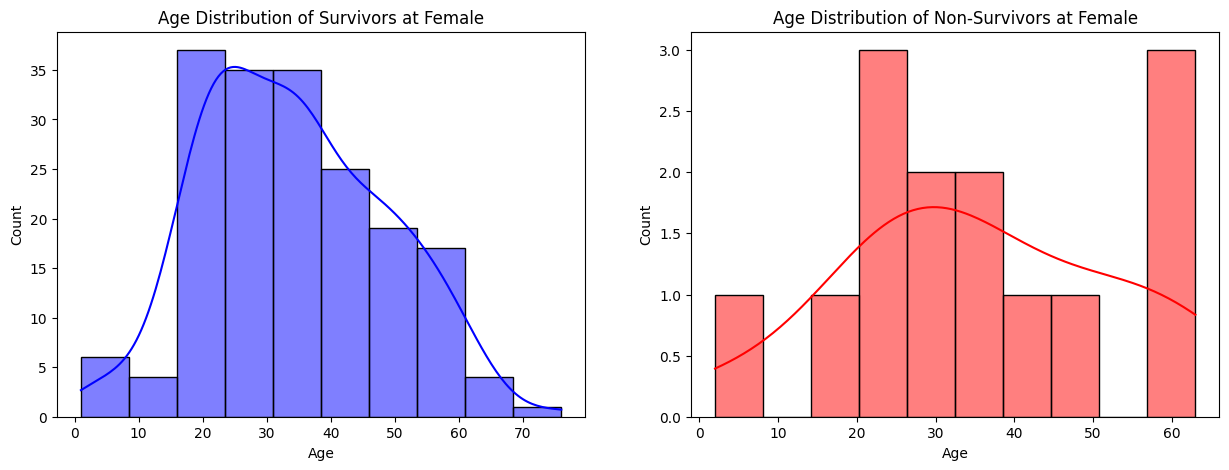

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df[(df['survived'] == 1) & (df['sex'] == 'female')]['age'], bins=10, kde=True, ax = ax[0], color='blue')
ax[0].set_title('Age Distribution of Survivors at Female')
ax[0].set_xlabel('Age')

sns.histplot(df[(df['survived'] == 0) & (df['sex'] == 'female')]['age'], bins=10, kde=True, ax = ax[1], color='red')
ax[1].set_title('Age Distribution of Non-Survivors at Female')
ax[1].set_xlabel('Age')

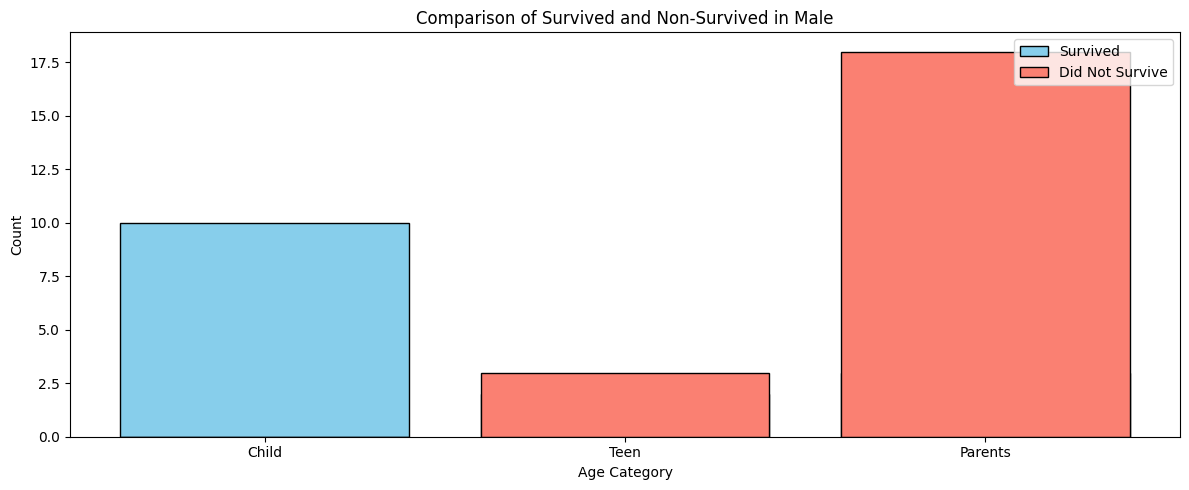

In [58]:
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Parents']
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

survived_males = df[(df['survived'] == 1) & (df['sex'] == 'male')]
non_survived_males = df[(df['survived'] == 0) & (df['sex'] == 'male')]

age_category_survived_male = survived_males['age_category'].value_counts().reindex(labels)
without_adult_survived_male = age_category_survived_male.drop('Adult')
age_category_non_male = non_survived_males['age_category'].value_counts().reindex(labels)
without_adult_non_male = age_category_non_male.drop('Adult')


fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(without_adult_survived_male.index, without_adult_survived_male.values, color='skyblue', edgecolor='black')
ax.bar(without_adult_non_male.index, without_adult_non_male.values, color='salmon', edgecolor='black')
ax.set_title('Comparison of Survived and Non-Survived in Male')
ax.set_xlabel('Age Category')
ax.set_ylabel('Count')
ax.legend(['Survived', 'Did Not Survive'], loc='upper right')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Age')

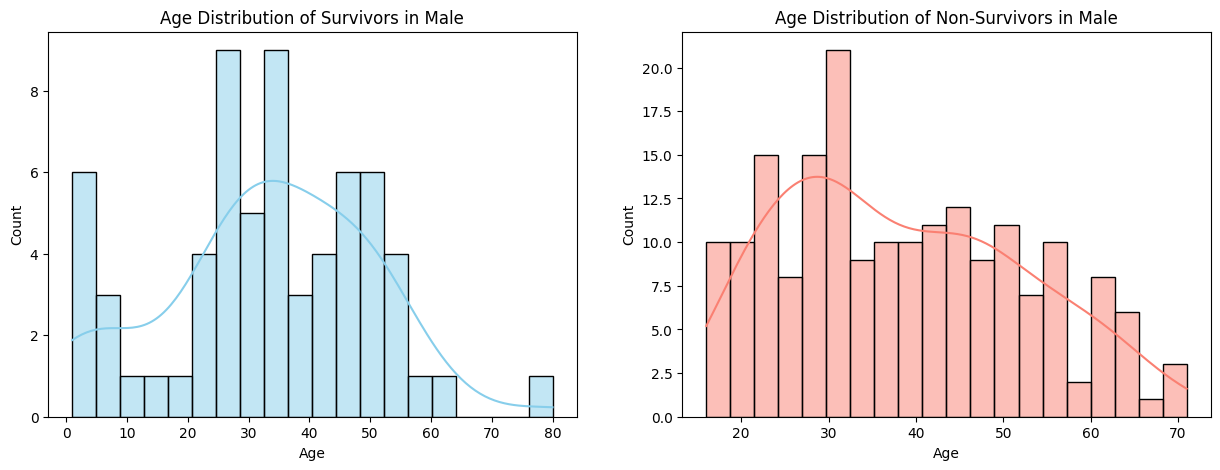

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df[(df['survived'] == 1) & (df['sex'] == 'male')]['age'], bins=20, kde=True, ax = ax[0], color='skyblue')
ax[0].set_title('Age Distribution of Survivors in Male')
ax[0].set_xlabel('Age')

sns.histplot(df[(df['survived'] == 0) & (df['sex'] == 'male')]['age'], bins=20, kde=True, ax = ax[1], color='salmon')
ax[1].set_title('Age Distribution of Non-Survivors in Male')
ax[1].set_xlabel('Age')